In [1]:
import pandas
import geopandas
from math import isnan


def xref_locations(first, second, first_x='POSITION_X', first_y='POSITION_Y', first_z='POSITION_Z',
                   second_x='X', second_y='Y', second_z='Slice',
                   max_dist=2, verbose=False):
    pairwise_elements = pandas.DataFrame()
    first_measurements = pandas.read_csv(first)
    second_measurements = pandas.read_csv(second)
    first_gdf = geopandas.GeoDataFrame(
        first_measurements,
        geometry=geopandas.points_from_xy(first_measurements[first_x],
                                          first_measurements[first_y],
                                          first_measurements[first_z]))
    second_gdf = geopandas.GeoDataFrame(
        second_measurements,
        geometry=geopandas.points_from_xy(second_measurements[second_x],
                                          second_measurements[second_y],
                                          second_measurements[second_z]))
    ti_rows = first_gdf.shape[0]
    tj_rows = second_gdf.shape[0]
    for ti_row in range(0, ti_rows):
        if verbose:
            print(f"On row: {ti_row}")
        ti_element = first_gdf.iloc[[ti_row, ]]
        titj = geopandas.sjoin_nearest(ti_element, second_gdf,
                                       distance_col="pairwise_dist",
                                       max_distance=max_dist)
        chosen_closest_dist = titj.pairwise_dist.min()
        if (isnan(chosen_closest_dist)):
            print(f"This element has no neighbor within {max_dist}.")
        else:
            chosen_closest_cell = titj.pairwise_dist == chosen_closest_dist
            chosen_closest_row = titj[chosen_closest_cell]
            pairwise_tmp = pandas.concat([pairwise_elements, chosen_closest_row])
            pairwise_elements = pairwise_tmp
    return pairwise_elements

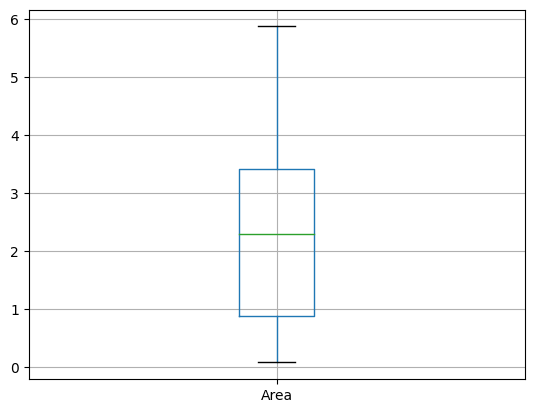

In [3]:
first = '/home/saka/Documents/Lab_stuff/confocal/exp2/tracks_from_script.csv'
second = '/home/saka/Documents/Lab_stuff/confocal/exp2/results_bacteria.csv'

import matplotlib.pyplot as plt
pairwise = xref_locations(first, second, 
                          first_x='POSITION_X', 
                          first_y='POSITION_Y', 
                          first_z='POSITION_Z', 
                          second_x='X', 
                          second_y='Y', 
                          second_z='Slice', 
                          verbose=False)
pairwise.head()
pairwise.shape
area_box = pairwise.boxplot(column='Area')
area_box.plot()
plt.show()

In [33]:
pairwise.head()

,LABEL,ID,TRACK_ID,QUALITY,POSITION_X,POSITION_Y,POSITION_Z,POSITION_T,FRAME,RADIUS,...,SNR_CH1,geometry,index_right,object_ID,Area,X,Y,Slice,Frame,pairwise_dist
0,ID3255,3255,0,1072,19.174245,13.914444,3.557836,1801.8,3,1.359034,...,0.851284,POINT Z (19.17425 13.91444 3.55784),11,12,2.903,19.152,14.076,4,4,0.163080
1,ID3272,3272,0,782,19.744354,13.525865,3.758312,2402.4,4,1.223398,...,0.960940,POINT Z (19.74435 13.52587 3.75831),19,20,3.482,19.736,13.273,5,5,0.253003
2,ID3274,3274,0,907,18.022013,16.414509,3.866593,1201.2,2,1.285389,...,0.988358,POINT Z (18.02201 16.41451 3.86659),4,5,2.619,17.929,16.364,4,3,0.105842
3,ID3328,3328,1,434,15.177814,8.883561,5.500000,12612.6,21,1.005376,...,0.308222,POINT Z (15.17781 8.88356 5.50000),162,163,3.266,15.239,8.917,6,23,0.069727
4,ID3265,3265,1,781,16.020348,9.121823,5.244558,3603.6,6,1.222876,...,0.860317,POINT Z (16.02035 9.12182 5.24456),32,33,0.745,16.062,9.072,8,7,0.064940


In [4]:
pairwise.to_csv('/home/saka/Documents/Lab_stuff/confocal/exp2/tracking.csv')

In [5]:
dataset = '/home/saka/Documents/Lab_stuff/confocal/exp2/tracking.csv'
df = pandas.read_csv(dataset)
df.head()

,Unnamed: 0,LABEL,ID,TRACK_ID,QUALITY,POSITION_X,POSITION_Y,POSITION_Z,POSITION_T,FRAME,...,SNR_CH1,geometry,index_right,object_ID,Area,X,Y,Slice,Frame,pairwise_dist
0,0,ID85892,85892,0,818,15.074031,7.626002,4.344743,6606.6,11,...,NaN,POINT Z (15.0740306778271 7.62600231583196 4.3...,48,49,0.118,15.252,7.824,6,11,0.266226
1,1,ID96649,96649,0,515,14.093282,7.720758,4.980583,12612.6,21,...,NaN,POINT Z (14.0932817022095 7.72075766591633 4.9...,112,113,0.196,14.177,7.834,6,18,0.140828
2,1,ID96649,96649,0,515,14.093282,7.720758,4.980583,12612.6,21,...,NaN,POINT Z (14.0932817022095 7.72075766591633 4.9...,62,63,0.196,14.177,7.834,6,13,0.140828
3,2,ID113544,113544,0,206,12.873218,6.696458,9.427184,19819.8,33,...,NaN,POINT Z (12.8732177650901 6.69645779026554 9.4...,250,251,0.333,12.738,6.813,5,31,0.178510
4,3,ID85512,85512,0,484,19.753968,13.586736,3.733471,2402.4,4,...,NaN,POINT Z (19.7539682096275 13.5867359552441 3.7...,20,21,1.363,19.558,13.761,6,5,0.262243


In [6]:
grouped = df.groupby('TRACK_ID')['object_ID'].apply(list).reset_index()

In [7]:
grouped.rename(columns={'object_ID': 'object_ID_list'}, inplace=True)

In [8]:
print (grouped)

   TRACK_ID                                     object_ID_list
0         0  [49, 113, 63, 251, 21, 511, 586, 244, 310, 297...
1         1                     [320, 367, 380, 318, 351, 361]
2         2  [536, 610, 465, 569, 519, 366, 339, 474, 415, ...


In [9]:
grouped.to_csv('/home/saka/Documents/Lab_stuff/confocal/exp2/grouped.csv')

In [10]:
testing = pandas.read_csv('/home/saka/Documents/Lab_stuff/confocal/exp2/grouped.csv')

In [11]:
single_row = testing.iloc[1]
print(single_row)

Unnamed: 0                                     1
TRACK_ID                                       1
object_ID_list    [320, 367, 380, 318, 351, 361]
Name: 1, dtype: object


In [12]:
from cellpose import models, io
from cellpose.io import *
from collections import defaultdict
import geopandas
import glob
import imagej
from jpype import JArray, JInt
import matplotlib.pyplot as plt
import multiprocessing as mp
import numpy as np
from math import isnan
import os
import pandas
from pandas import DataFrame
from pathlib import Path
import scyjava
import seaborn
import shutil
import random
import tkinter as tk
from tkinter import filedialog

In [13]:
scyjava.config.add_option('-Xmx30g')
start_dir = os.getcwd()
#ij = imagej.init('sc.fiji:fiji', mode='interactive')
ij = imagej.init('/home/saka/sw/local/fiji/2023', mode='interactive')
## Something about this init() function changes the current working directory.
ij.getApp().getInfo(True)
ij.ui().showUI()
os.chdir(start_dir)
ij.getVersion()

'2.9.0/1.54e'

In [14]:
root = tk.Tk()
root.withdraw()
filepath = filedialog.askopenfilename()

In [15]:
image = ij.io().open(filepath)
imp = ij.py.to_imageplus(image)
imp.setDimensions(1, 11, 62)
ij.ui().show(imp)

In [16]:
pouet = testing['object_ID_list']
pouet.head()

0    [49, 113, 63, 251, 21, 511, 586, 244, 310, 297...
1                       [320, 367, 380, 318, 351, 361]
2    [536, 610, 465, 569, 519, 366, 339, 474, 415, ...
Name: object_ID_list, dtype: object

In [21]:
colors = ["blue", "cyan", "green", "magenta", "orange", "red", "yellow"]
rm = ij.RoiManager.getRoiManager()
for i in range(len(pouet)):
    single_row = pouet.iloc[i]
    random_color = random.choice(colors)
#row_cellids = single_row.child_cell_ids
    row_cleaned = single_row.strip('[').strip(']')
    row_array = row_cleaned.split(', ')
    for cell in row_array:
        cell_index = int(cell)
        roi = rm.select(cell_index - 1)
        overlay_command = f"Overlay.addSelection('{random_color}',2);"
        ij.py.run_macro(overlay_command)

In [23]:
qc = """
run("Duplicate...", "duplicate");
setMinAndMax(0, 50);
run("Flatten", "stack");
run("Z Project...", "projection=[Max Intensity] all");
"""
ij.py.run_macro(qc)

<java object 'org.scijava.script.ScriptModule'>